In [ ]:
#We will solve titanic project with deep learning

In [ ]:
#Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pickle

In [ ]:
#Read the data

In [ ]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [ ]:
#see first 5 cels

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#remove name colon

In [ ]:
df_train.drop("Name",axis=1,inplace=True)
df_test.drop("Name",axis=1,inplace=True)
df=df_train

In [ ]:
#check

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#see mising values

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
# Separate numeric and categorical columns

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

In [ ]:
# Impute missing values for numeric columns using mean

In [ ]:
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

In [ ]:
# Impute missing values for categorical columns using most frequent

In [ ]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [ ]:
#check

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [ ]:
# MODEL

In [ ]:
model=Sequential()
model.add(Dense(155,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#data split

In [ ]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [ ]:
#drop ticket cabin

In [ ]:
X.drop("Ticket",axis=1,inplace=True)
X.drop("Cabin",axis=1,inplace=True)

In [ ]:
#make dummy colons

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,3.0,22.0,1.0,0.0,7.2500,True,False,True
1,2.0,1.0,38.0,1.0,0.0,71.2833,False,False,False
2,3.0,3.0,26.0,0.0,0.0,7.9250,False,False,True
3,4.0,1.0,35.0,1.0,0.0,53.1000,False,False,True
4,5.0,3.0,35.0,0.0,0.0,8.0500,True,False,True


In [ ]:
#fit model

In [ ]:
history=model.fit(X,y,epochs=1000,batch_size=50,validation_split=.20,verbose=1)

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5647 - loss: 3.2392 - val_accuracy: 0.3575 - val_loss: 1.0881
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4856 - loss: 0.7577 - val_accuracy: 0.6872 - val_loss: 0.9405
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5798 - loss: 0.7195 - val_accuracy: 0.3631 - val_loss: 0.7833
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4661 - loss: 0.7366 - val_accuracy: 0.6760 - val_loss: 0.6531
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6398 - loss: 0.6411 - val_accuracy: 0.6760 - val_loss: 0.6797
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6209 - loss: 0.6731 - val_accuracy: 0.6872 - val_loss: 0.6739
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6344 - loss: 0.6678 - val_accuracy: 0.7095 - val_loss: 0.6748
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5790 - loss: 0.7122 - val_accurac

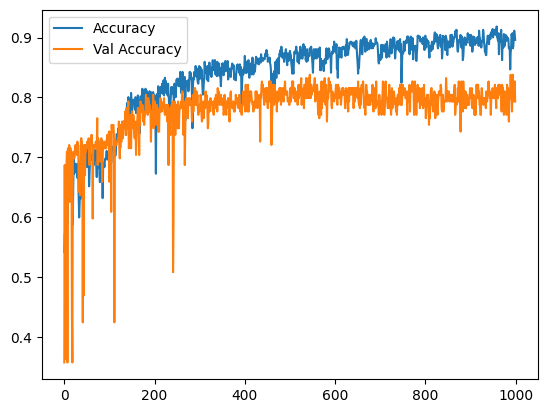

In [ ]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend();

In [ ]:
#predict test data

In [ ]:
df_test.drop("Ticket",axis=1,inplace=True)
df_test.drop("Cabin",axis=1,inplace=True)
df_test=pd.get_dummies(df_test,drop_first=True)

In [ ]:
#//

In [ ]:
predictions=model.predict(df_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
#save model

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
#sources

-Zafer Acar Notes
,-[https://poe.com/chat/2rhcfi4djoj4u359vfr]